# Topic Modeling of Episode Descriptions

## Install required Modules

In [1]:
!pip install top2vec
!pip install scikit-learn
!pip install pandas
!pip install torch
!pip install tensorflow
!pip install bertopic
!pip install sentence-transformers
!pip install spacy
!pip install gensim
!pip install pyldavis
!pip install tf-keras

# Import Dataframe

In [1]:
import pandas as pd

PATH_TO_RAW_DATA : str = "../../data/episodes_descriptions.json"
PATH_TO_CLEAN_DATA : str = "../../data/episodes_description.csv"
df = pd.read_csv(PATH_TO_CLEAN_DATA)

df


,Unnamed: 0,title,text
0,0,Pilot,middle night obviously drunk rick bursts morty...
1,1,Lawnmower Dog,jerry complains family dog snuffles stupid r...
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol..."
3,3,M. Night Shaym-Aliens!,episode opens rick dissecting large rat garage...
4,4,Meeseeks and Destroy,mr meeseeks existing solve beth ’s problemafte...
...,...,...,...
76,76,Mercy Kill,planet dorian 5 supernova vance slaughtering i...
77,77,Girls Night,bar calypso diablo verde lady katana supernova...
78,78,Kintsugi,""" unknown planet somber alan rails puts togeth..."
79,79,Little Trains,doom nomitron arrives destroy earth satellite ...


## Replace Frequent Character names

In [3]:
df["text"] = df["text"].apply(lambda x: x.replace("rick" , "").replace("morty", "").replace("summer","").replace("jerry" ,"").replace("beth",""))
df

,Unnamed: 0,title,text
0,0,Pilot,middle night obviously drunk bursts ’s room ...
1,1,Lawnmower Dog,complains family dog snuffles stupid gives...
2,2,Anatomy Park (Episode),"christmas tries enforce idea "" human holiday ..."
3,3,M. Night Shaym-Aliens!,episode opens dissecting large rat garage com...
4,4,Meeseeks and Destroy,mr meeseeks existing solve ’s problemafter pa...
...,...,...,...
76,76,Mercy Kill,planet dorian 5 supernova vance slaughtering i...
77,77,Girls Night,bar calypso diablo verde lady katana supernova...
78,78,Kintsugi,""" unknown planet somber alan rails puts togeth..."
79,79,Little Trains,doom nomitron arrives destroy earth satellite ...


In [4]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy

In [5]:
import spacy
def lemmatize(docs, allowed_postags :list[str] = ["NOUN",  "ADJ", "VERB", "ADV"]) -> list:
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)

In [6]:

def tokenize(docs) -> list:
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


In [7]:
def document_extractor (docs : list) -> list:
    output = []

    for doc in docs:
        n = 300
        [output.append(doc[i:i+n]) for i in range(0, len(doc), n)]

    return output
        

## Create episode no. Column and filter on Season 7

In [8]:
df = df.rename(columns={"Unnamed: 0" : "episode no."})
df["episode no."] = df["episode no."].apply(lambda x: int(x) + 1)
df = df[(df["episode no."] <= 71)] # Herausfiltern der Falschen
df

,episode no.,title,text
0,1,Pilot,middle night obviously drunk bursts ’s room ...
1,2,Lawnmower Dog,complains family dog snuffles stupid gives...
2,3,Anatomy Park (Episode),"christmas tries enforce idea "" human holiday ..."
3,4,M. Night Shaym-Aliens!,episode opens dissecting large rat garage com...
4,5,Meeseeks and Destroy,mr meeseeks existing solve ’s problemafter pa...
...,...,...,...
66,67,Rickfending Your Mort,finds drunken stupor floor garage still depr...
67,68,Wet Kuat Amortican Summer,"’s chores ( including cleaning another "" ’s ..."
68,69,Rise of the Numbericons: The Movie,"episode starts exact way post credits scene "" ..."
69,70,Mort: Ragnarick,white void golden light appear front nana com...


### Split Dataframes into seasons

In [9]:
seasons_splitter = [(1,11) , (12,20) , (21,30) , (31,40) , (41,50) , (51, 70)]
seasons_dfs : list[pd.DataFrame]= []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])

seasons_dfs[2]

,episode no.,title,text
20,21,The Wedding Squanchers,eating breakfast telling get job knoc...
21,22,The Rickshank Rickdemption,episode starts family sitting booth old fashi...
22,23,Rickmancing the Stone,wearing fall portal back garage another ad...
23,24,Pickle Rick,guess needing preparing school advised therap...
24,25,Vindicators 3: The Return of Worldender,start garage cleaning multiple worm like cre...
25,26,The Whirly Dirly Conspiracy,episode begins wallowing lonely new life prep...
26,27,Rest and Ricklaxation,episode begins school hears jessica broke bra...
27,28,The Ricklantis Mixup,prepare go atlantis interrupted pair looki...
28,29,Morty's Mind Blowers,episode starts run strange humanoid creature...
29,30,The ABC's of Beth,learning news convicted child murderer joseph ...


## Top2Vec (for All)

In [10]:
#docs = list(df.filter(items=[8, 9 ,10,11] , axis=0)["text"])
docs = df["text"]
docs = document_extractor(docs)
print(docs)


['middle night obviously drunk  bursts  ’s room tells " surprise " show driving newly built flying vehicle  explains made neutrino bomb : decided earth needs " fresh start " end wants destroy humanity planning start  jessica new " adam eve "  tries " take control situation " taking wheel vehicle  even', 'tually decides land vehicle says test get  act assertive passes bomb announces armed ( presumably ) activates.the next morning  falls asleep breakfast mother  concerned  ’s older sister  explains grandpa  causes argument  father law  points thinks school utter waste time ; leaving room compliments b', 'reakfast daughter  made causing cry tears joy stop angry father much husband  ’s annoyance.at school later day mr goldenfold administers math test  falls asleep sinking dream filled numbers dream quickly however evolves sexual encounter jessica asks play exposed breasts mr goldenfold unwittingly fin', 'ds receiving end  ’s subconscious fantasy later  accosted bully named frank ; appearin

In [11]:
'''
Topic Modeling with Top2Vec: Minimum Viable Example
References:
[1] https://github.com/ddangelov/Top2Vec
[2] https://top2vec.readthedocs.io/_/downloads/en/stable/pdf/
'''
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups


#tokenize_docs = tokenize(lemmatize_docs)



# Create jointly embedded topic, document and word vectors
topic_model = Top2Vec(
  docs, 
  embedding_model = 'doc2vec', # Embedding model: See [1,2] for supported models
  min_count = 3,              # Ignore words less frequent than this value
  umap_args = None,            # Dict of custom args for UMAP
  hdbscan_args = None          # Dict of custom argd for HDBSCAN
  )

# Visualization examples: See [1,2] for more details

# Search the closest 5 topics to the input query "faith"
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(
    keywords = ["rick"], 
    num_topics = 2)

# Plot the resulting topics as wordclouds
for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

2025-02-07 09:19:15.889320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738916355.903469    9172 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738916355.907730    9172 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 09:19:15.921098: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-07 09:19:19,028 - top2vec - INFO - Pre-processing documents for training
2025-02-07 09:19:19,101 - top2vec - INFO - C

ValueError: 'rick' has not been learned by the model so it cannot be searched.

In [ ]:
print(topic_model.get_topics())

## BERTopic (for All)

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

docs = df["text"]
docs = document_extractor(docs)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


cluster_model = HDBSCAN(min_cluster_size = 5, 
                        metric = 'euclidean', 
                        cluster_selection_method = 'eom', 
                        prediction_data = True)


topic_model = BERTopic(embedding_model = embedding_model,
                       hdbscan_model = cluster_model)


topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics = 20)

 ## MNF (for All)

In [ ]:
'''
Topic Modeling with NMF: Minimum Viable Example
References:
[1] https://radimrehurek.com/gensim/models/nmf.html
'''

# Import dependencies
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


def lemmatize(docs, allowed_postags = ["NOUN", "ADJ"]):
  '''
  Performs lemmization of input documents.
  Args:
    - docs: list of strings with input documents
    - allowed_postags: list of accepted Part of Speech (POS) types
  Output:
    - list of strings with lemmatized input
  '''
  nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])
  lemmatized_docs = []
  for doc in docs:
    doc = nlp(doc)
    tokens = []
    for token in doc:
      if token.pos_ in allowed_postags:
        tokens.append(token.lemma_)
    lemmatized_docs.append(" ".join(tokens))
  return (lemmatized_docs)


def tokenize(docs):
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)


# Fetch 20newsgropus dataset
docs = df["text"]

# Pre-process input: lemmatization and tokenization
lemmatized_docs = lemmatize(docs)
tokenized_docs = tokenize(lemmatized_docs)

# Mapping from word IDs to words
id2word = corpora.Dictionary(tokenized_docs)

# Prepare Document-Term Matrix
corpus = []
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))

# Fit NMF model: See [1] for more details
nmf_model = gensim.models.Nmf(
    corpus = corpus,     # Document-Term Matrix
    id2word = id2word,   # Map word IDs to words
    num_topics = 10,     # Number of latent topics to extract
    random_state = 100,
    passes = 100,        # N° of passes through the corpus during training
    )

# Get the topics sorted by sparsity
nmf_model.show_topics()

## LDA (for All)

In [12]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings

In [13]:
corpus = []

tokenized_docs = tokenize(df["text"])
id2word = corpora.Dictionary(tokenized_docs)
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))


topic_model = gensim.models.ldamodel.LdaModel(
    corpus = corpus,      # Document-Term Matrix
    id2word = id2word,    # Map word IDs to words
    num_topics = 50,      # Number of latent topics to extract
    random_state = 100,
    passes = 100,         # N° of passes through the corpus during training
    )

# Visualize with pyLDAvis: See [2] for more details
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(
    topic_model, 
    corpus,
    id2word, 
    mds = "mmds", 
    R = 30)

visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26     0.210004 -0.255340       1        1  14.128238
20     0.014083 -0.358329       2        1   6.331356
4     -0.028680 -0.290411       3        1   5.451708
16    -0.134372 -0.286528       4        1   5.187743
24     0.090616 -0.310198       5        1   4.958937
33     0.243280 -0.187792       6        1   4.466860
5     -0.207298 -0.252788       7        1   3.980061
35     0.180071 -0.301228       8        1   3.957171
46    -0.328737  0.084439       9        1   3.670359
43     0.346813 -0.092312      10        1   3.485812
3     -0.144123 -0.351148      11        1   3.473417
18    -0.243190 -0.179800      12        1   3.337165
1     -0.293338 -0.079244      13        1   2.867988
21     0.324739  0.162154      14        1   2.846066
22    -0.323646 -0.136526      15        1   2.432157
2     -0.269670  0.256682      16        1   2.247660
29    -0.321785  0.030991      17        1   2.239757
7      0.319882  0.041976      18        1   2.213396
44    -0.265745 -0.025896      19        1   2.185182
30     0.133490 -0.211850      20        1   2.181081
17    -0.172784 -0.131080      21        1   1.804642
45     0.035365 -0.213116      22        1   1.561424
28     0.246156  0.002991      23        1   1.411747
49    -0.059185 -0.146787      24        1   1.380117
25     0.099734  0.254005      25        1   1.286470
10     0.281378 -0.068211      26        1   1.244318
23    -0.129646  0.315598      27        1   1.243620
9      0.074740  0.331122      28        1   1.171329
15    -0.224691  0.143786      29        1   1.154974
19    -0.165848  0.207503      30        1   1.085351
14    -0.029830  0.337401      31        1   1.065263
13     0.158866 -0.060966      32        1   1.038198
37     0.196948  0.188481      33        1   0.835054
48     0.185011  0.118444      34        1   0.691180
47     0.146736  0.237988      35        1   0.599233
34    -0.001942  0.203991      36        1   0.404727
36    -0.071303  0.101290      37        1   0.302398
12     0.012440  0.079074      38        1   0.028627
31     0.009622  0.070136      39        1   0.004101
6      0.009622  0.070136      40        1   0.004101
8      0.009622  0.070136      41        1   0.004101
27     0.009622  0.070136      42        1   0.004101
41     0.009622  0.070136      43        1   0.004101
42     0.009622  0.070136      44        1   0.004101
40     0.009622  0.070136      45        1   0.004101
39     0.009622  0.070136      46        1   0.004101
38     0.009622  0.070136      47        1   0.004101
32     0.009622  0.070136      48        1   0.004101
11     0.009622  0.070136      49        1   0.004101
0      0.009622  0.070136      50        1   0.004101, topic_info=             Term        Freq       Total Category  logprob  loglift
253            mr   99.000000   99.000000  Default  30.0000  30.0000
486        family  175.000000  175.000000  Default  29.0000  29.0000
2791    president   93.000000   93.000000  Default  28.0000  28.0000
2800        snake   54.000000   54.000000  Default  27.0000  27.0000
406          time  151.000000  151.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
4        addition    0.000188    2.308230  Topic50  -8.9368   0.6835
5     administers    0.000188    2.443991  Topic50  -8.9368   0.6263
6      adventures    0.000188   22.264272  Topic50  -8.9368  -1.5830
7      aggravated    0.000188    1.594167  Topic50  -8.9368   1.0536
8           aging    0.000188    2.512444  Topic50  -8.9368   0.5987

[3037 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1206      6  0.589923   abandoned
1206     13  0.393282   abandoned
6393     19  0.699439  abandoning
2992     34  0.826950    abandons
1525      4  0.150285     ability
...     ...       ...         ...
911      33

In [14]:
topic_model.print_topics(num_topics=50)

[(0,
  '0.000*"time" + 0.000*"device" + 0.000*"one" + 0.000*"evil" + 0.000*"back" + 0.000*"prime" + 0.000*"portal" + 0.000*"citadel" + 0.000*"go" + 0.000*"make"'),
 (1,
  '0.020*"dimension" + 0.015*"prime" + 0.012*"family" + 0.009*"back" + 0.007*"space" + 0.006*"new" + 0.006*"however" + 0.006*"killed" + 0.005*"reggie" + 0.005*"revenge"'),
 (2,
  '0.032*"cop" + 0.013*"campaign" + 0.013*"manager" + 0.012*"portal" + 0.012*"politician" + 0.010*"citadel" + 0.009*"new" + 0.009*"town" + 0.009*"left" + 0.008*"president"'),
 (3,
  '0.043*"snake" + 0.038*"time" + 0.021*"snakes" + 0.011*"slippy" + 0.010*"travel" + 0.009*"back" + 0.008*"planet" + 0.008*"one" + 0.007*"two" + 0.007*"deer"'),
 (4,
  '0.017*"birdperson" + 0.012*"president" + 0.011*"turkey" + 0.011*"memory" + 0.006*"two" + 0.006*"alien" + 0.005*"pibbles" + 0.004*"family" + 0.004*"turkeys" + 0.004*"tells"'),
 (5,
  '0.025*"fear" + 0.024*"hole" + 0.015*"unity" + 0.014*"night" + 0.013*"family" + 0.011*"diane" + 0.009*"day" + 0.007*"one" +

In [ ]:
df

In [15]:
def logging_topic_relevance_per_episode(topic_id : int)-> list[float]:
    values = []
    for i in range(df.shape[0]):
        other_texts = tokenize( df[(df["episode no."] == i + 1)]["text"])
        other_corpus = [id2word.doc2bow(text) for text in other_texts]
        values.append(topic_model.get_document_topics(bow=other_corpus , minimum_probability=0.0 ,per_word_topics=True)[0][0][topic_id][1])
    return values

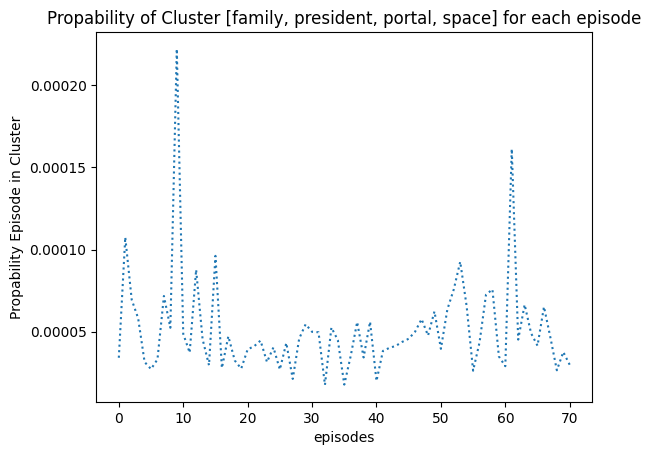

In [31]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array(logging_topic_relevance_per_episode(11))

plt.plot(ypoints, linestyle = 'dotted')
plt.ylabel("Propability Episode in Cluster")
plt.title("Propability of Cluster [family, president, portal, space] for each episode")
plt.xlabel("episodes")
plt.show()

In [ ]:
topic_model.get_topic_terms(25 , topn=20)

In [ ]:
id2word[5076]

# LDA Per Season

In [ ]:
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

seasons_dfs


In [ ]:
vizualisations :list = []

for season_df in seasons_dfs:
    tokenized_docs =  tokenize(season_df["text"])
    id2word = corpora.Dictionary(tokenized_docs)
    corpus = []
    for doc in tokenized_docs:
        corpus.append(id2word.doc2bow(doc))
    
    # Fit LDA model: See [1] for more details
    topic_model = gensim.models.ldamodel.LdaModel(
        corpus = corpus,      # Document-Term Matrix
        id2word = id2word,    # Map word IDs to words
        num_topics = 25,      # Number of latent topics to extract
        random_state = 100,
        passes = 100,         # N° of passes through the corpus during training
        )
    
    # Visualize with pyLDAvis: See [2] for more details
    pyLDAvis.enable_notebook()
    visualization = pyLDAvis.gensim_models.prepare(
        topic_model, 
        corpus,
        id2word, 
        mds = "mmds", 
        R = 30)
    
    vizualisations.append(visualization)

In [ ]:
len(vizualisations)

In [ ]:
vizualisations[0]

In [ ]:
vizualisations[1]

In [ ]:
vizualisations[2]

In [ ]:
vizualisations[3]

In [ ]:
vizualisations[4]